In [2]:
import pandas as pd

In [3]:
cars= pd.read_csv(r"C:\Users\acreddy\Desktop\ML.DS\automobile\auto.data", names= ["symboling", "normalized-losses", "make", 
                "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", 
                "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", 
                "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"], index_col=False)

In [4]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
# replace "-" with "_" in columns 
cars= cars.rename(columns= lambda x: x.replace("-", "_"))

In [6]:
cars.head().transpose()

,0,1,2,3,4
symboling,3,3,1,2,2
normalized_losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel_type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num_of_doors,two,two,two,four,four
body_style,convertible,convertible,hatchback,sedan,sedan
drive_wheels,rwd,rwd,rwd,fwd,4wd
engine_location,front,front,front,front,front
wheel_base,88.6,88.6,94.5,99.8,99.4


In [7]:
len(cars)

205

In [8]:
# drop the un-necessary columns
cars= cars.drop(["normalized_losses", "aspiration", "engine_location", "engine_type", "fuel_system"], axis=1)

In [9]:
# so drop drive-wheels also has no much variance in the column
cars["drive_wheels"].value_counts()

drive_wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [10]:
# its also no much variation in the column so drop this as well
cars["body_style"].value_counts()

body_style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [11]:
# dropping make isnt ideal but make has different car brands its not ideal either, should have different datasets for each made
cars["make"].value_counts()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: count, dtype: int64

In [12]:
# so drop all the columns as no vairance in the columns as seen above
cars= cars.drop(["drive_wheels", "body_style", "make"], axis=1)

In [13]:
# convert object cols to float cols
num_cols= ["bore", "stroke", "horsepower", "peak_rpm", "price"]
cars[num_cols] = cars[num_cols].apply(pd.to_numeric, errors='coerce')

# we can achieve it with below way as well
#cars[num_cols]= cars[num_cols].astype(float)

In [14]:
cars["num_of_cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [15]:
# replacing cylinder string values to numeric with replace func
cars["num_of_cylinders"]= cars["num_of_cylinders"].replace({"two":2, "three":3, "four":4, "five":5, "six":6, "eight":8, "twelve":12})

# you can achieve same thing with below mapping func as well:
# cylinder_dict= {"two":2, "three":3, "four":4, "five":5, "six":6, "eight":8, "twelve":12}
# cars["num-of-cylinders"] = cars["num-of-cylinders"].map(cylinder_dict)

In [16]:
cars.dtypes

symboling              int64
fuel_type             object
num_of_doors          object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders       int64
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [17]:
cars.head(2).transpose()

,0,1
symboling,3,3
fuel_type,gas,gas
num_of_doors,two,two
wheel_base,88.6,88.6
length,168.8,168.8
width,64.1,64.1
height,48.8,48.8
curb_weight,2548,2548
num_of_cylinders,4,4
engine_size,130,130


In [18]:
cars["fuel_type"].value_counts()

fuel_type
gas       185
diesel     20
Name: count, dtype: int64

In [19]:
cars["num_of_doors"].value_counts()

num_of_doors
four    114
two      89
?         2
Name: count, dtype: int64

In [20]:
cars["num_of_doors"].isnull().sum()

0

In [21]:
# replace ?(null) values with np.nan so that we can fill using fillna
import numpy as np
cars= cars.replace('?', np.nan)

In [22]:
cars["num_of_doors"].isnull().sum()

2

In [23]:
cars["bore"].isnull().sum()

4

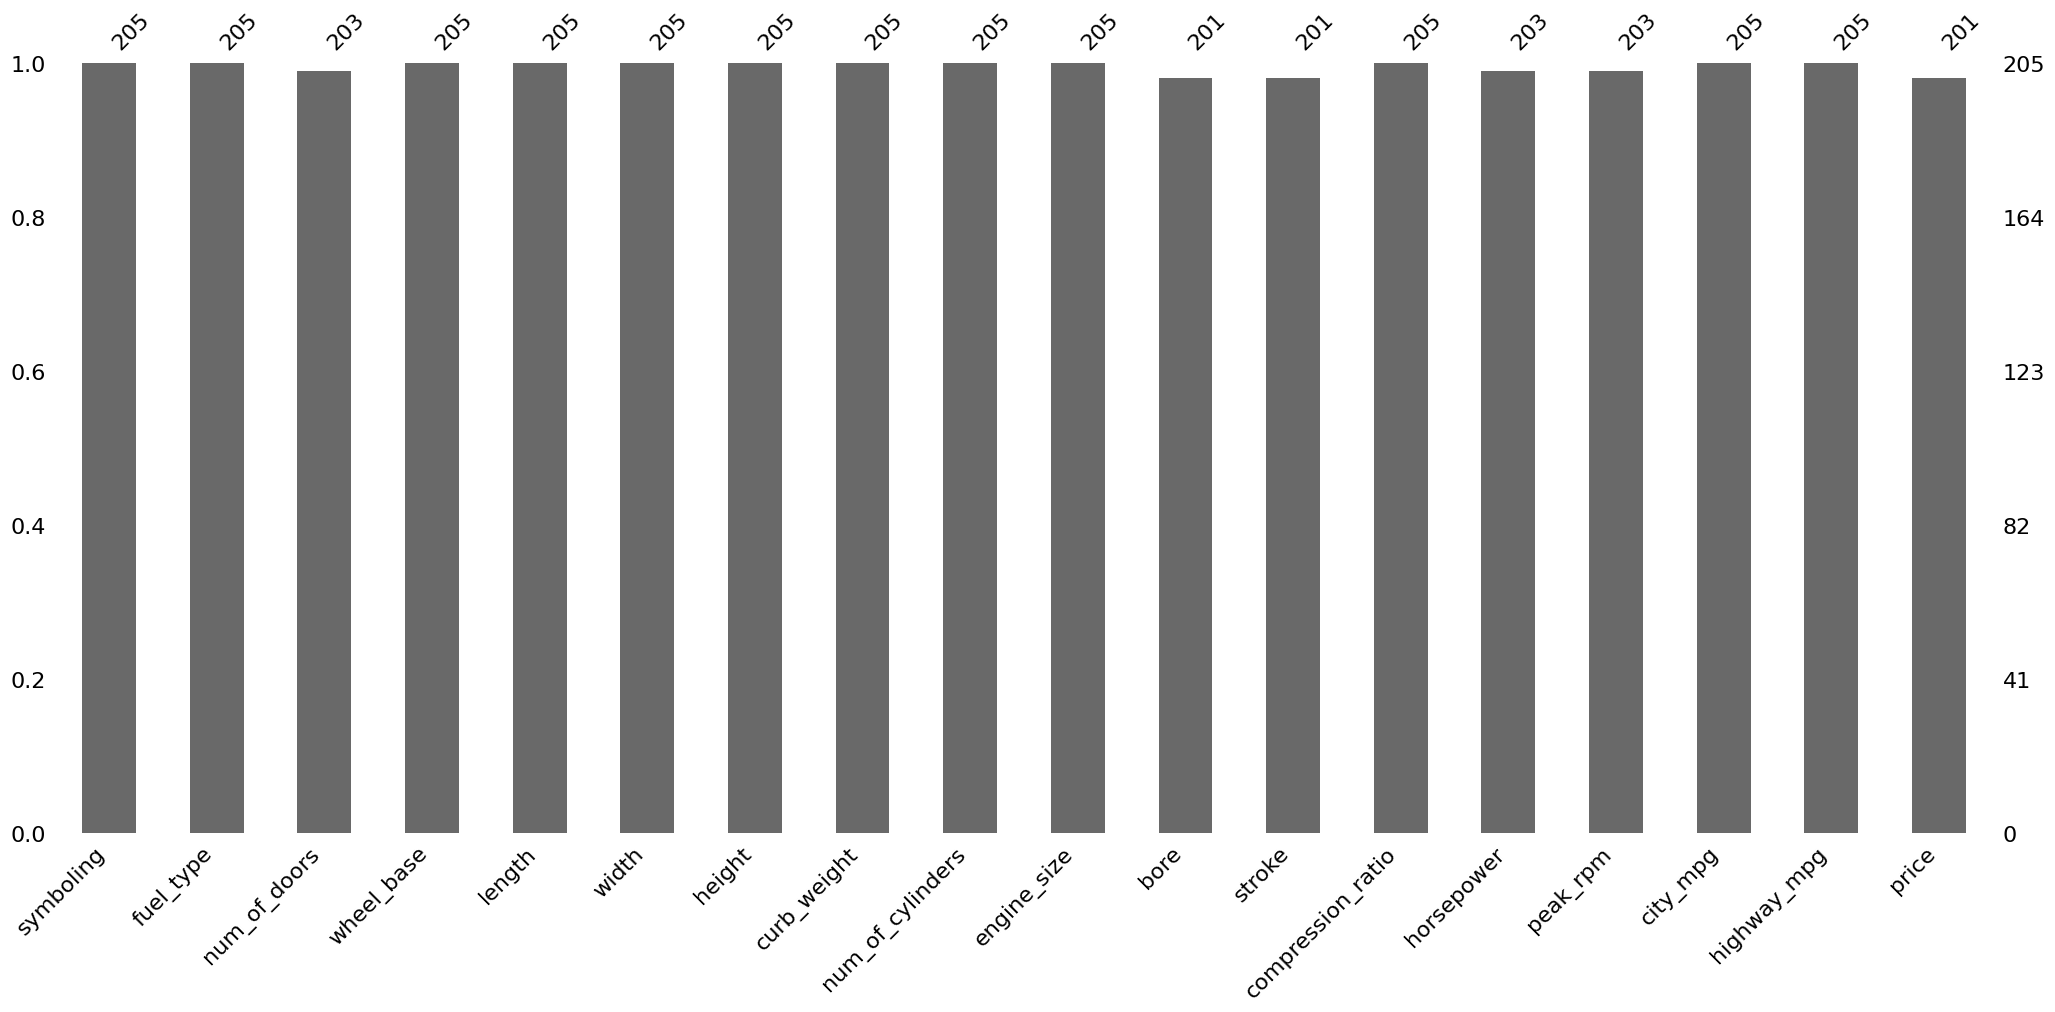

In [24]:
# should deal with null values before doing one-hot-encoding for cat features
# lets find which are the cols having null values pictorially
import missingno as msno
import matplotlib.pyplot as plt

# msno.matrix(cars)
msno.bar(cars)
plt.show()

In [25]:
# lets check the same thing in counts
cars.isnull().sum()

symboling            0
fuel_type            0
num_of_doors         2
wheel_base           0
length               0
width                0
height               0
curb_weight          0
num_of_cylinders     0
engine_size          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

In [26]:
cars.dtypes

symboling              int64
fuel_type             object
num_of_doors          object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders       int64
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [27]:
# fuel-type and num-of-doors are object type lets make numeric by one-hot-encoding
cars= pd.get_dummies(cars, columns= ["fuel_type", "num_of_doors"], prefix= ["fuel_type", "num_of_doors"], drop_first=True)

In [28]:
cars.head(2).transpose()

,0,1
symboling,3,3
wheel_base,88.6,88.6
length,168.8,168.8
width,64.1,64.1
height,48.8,48.8
curb_weight,2548,2548
num_of_cylinders,4,4
engine_size,130,130
bore,3.47,3.47
stroke,2.68,2.68


In [29]:
cars.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders       int64
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
fuel_type_gas           bool
num_of_doors_two        bool
dtype: object

In [30]:
# # lets fill the np.nan with relevant values(ex: median)
cols_to_fill= ["num_of_doors_two","bore","stroke", "horsepower", "peak_rpm", "price"]
# cars[cols_to_fill]= cars[cols_to_fill].fillna(cars[cols_to_fill].median())

In [31]:
# we can use imputers as well:
from sklearn.impute import SimpleImputer
imputer_mean= SimpleImputer(strategy="median")
cars[cols_to_fill]= imputer_mean.fit_transform(cars[cols_to_fill])

In [32]:
cars.isnull().sum()

symboling            0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
num_of_cylinders     0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
fuel_type_gas        0
num_of_doors_two     0
dtype: int64

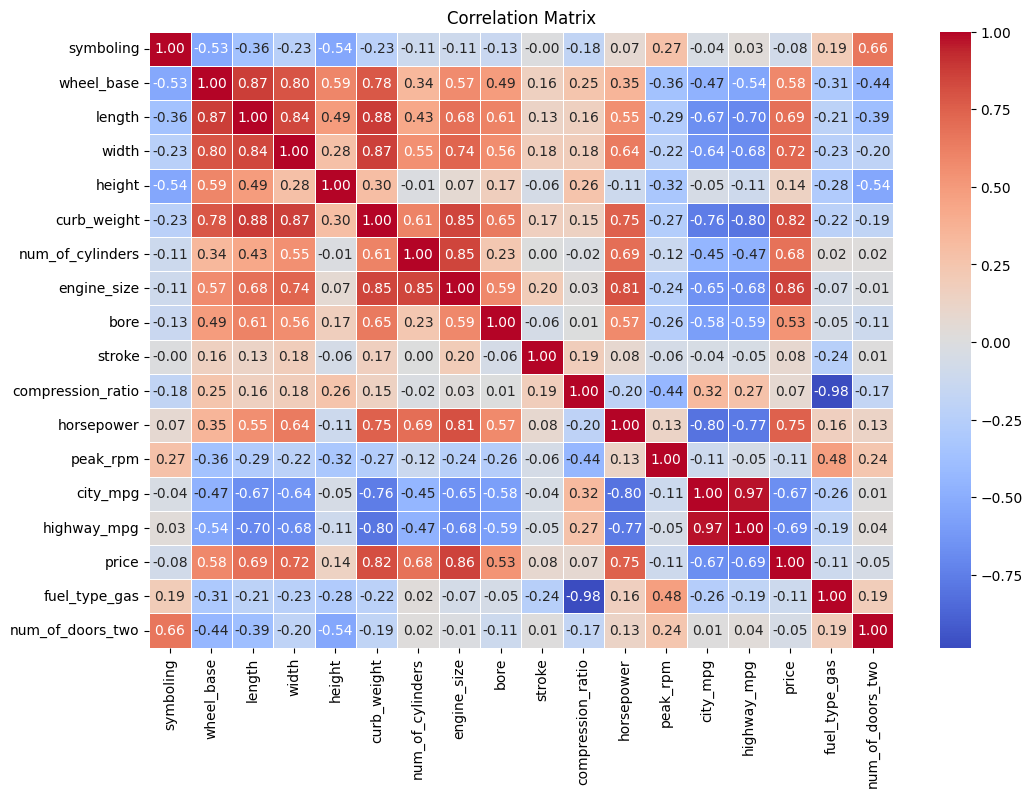

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation=cars.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, mask= None)
plt.title('Correlation Matrix')
plt.show()

Note:
  The above plot showing the correlation between Ivs and Target and also Between IVs.(We can drop those less correlated columns 
  with Target but its ideal to investigate is there any other relationships exists?).
    
  As its not showing up any non-linear relationships between IVs and Target. Bit if I use "mutual_info_regression" its gives the 
  linear and non-linear relashionships between IVs and Target.

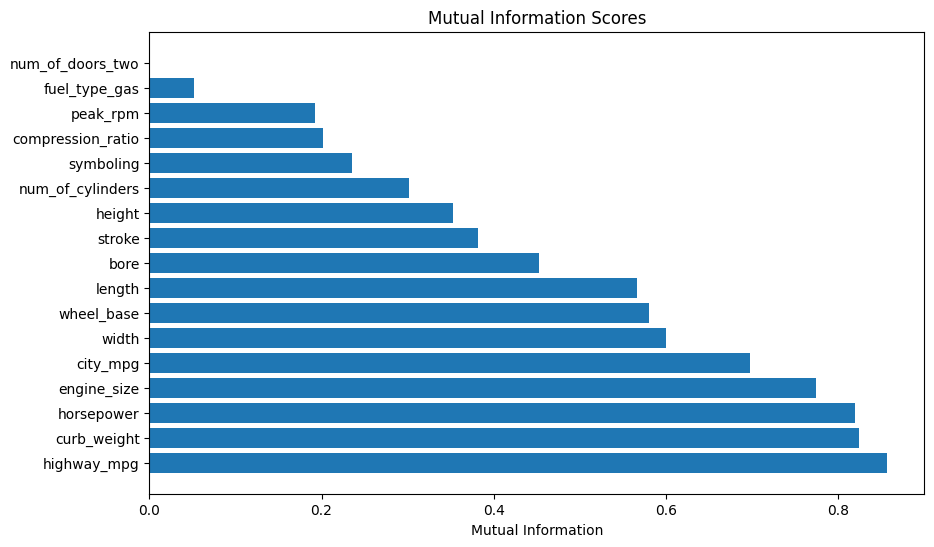

In [34]:
# to check if any linear and non-linear relationships btwn IVs and Target, using mutual_info_regression
from sklearn.feature_selection import mutual_info_regression

target = 'price'
feature_cols = ["symboling", "wheel_base", "length", "width", "height", "curb_weight", "num_of_cylinders", 
                   "engine_size", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", 
                    "highway_mpg", "fuel_type_gas", "num_of_doors_two"]

# Calculate mutual information between each feature and the target
mi_scores = mutual_info_regression(cars[feature_cols], cars[target])

# Create a DataFrame to visualize mutual information scores and sorting them ascending
mi_df = pd.DataFrame({'Feature': feature_cols, 'Mutual_Information': mi_scores}).sort_values(
                                                                by='Mutual_Information', ascending=False)

# Plot a bar chart of mutual information scores
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['Mutual_Information'])
plt.xlabel('Mutual Information')
plt.title('Mutual Information Scores')
plt.show()

Conclusion:
    
    As the above plot showing num-of-doors-two and fuel-type_gas is having very less mutual info. I can drop those
    colums but I am dropping only num-of-doors_two column only.

In [35]:
# dropping num-of-doors_two column
cars= cars.drop(["num_of_doors_two", "fuel_type_gas"], axis=1)

In [36]:
cars.head(2)

,symboling,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0


In [37]:
# lets get descriptive stats using describe
cars.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
num_of_cylinders,205.0,4.380488,1.080854,2.00,4.00,4.00,4.00,12.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329366,0.270858,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.256098,0.313634,2.07,3.11,3.29,3.41,4.17


Conclusion:
  -  Mean and Median of the columns seems have closer values 
  -  If we see left tail(25%-min) and right tail(75%-max) are having almost equal values.(except few like cylinders, price..etc)
 
 So both tellling us they likely have a symmetric bell curve distribution
 

In [38]:
import seaborn as sns

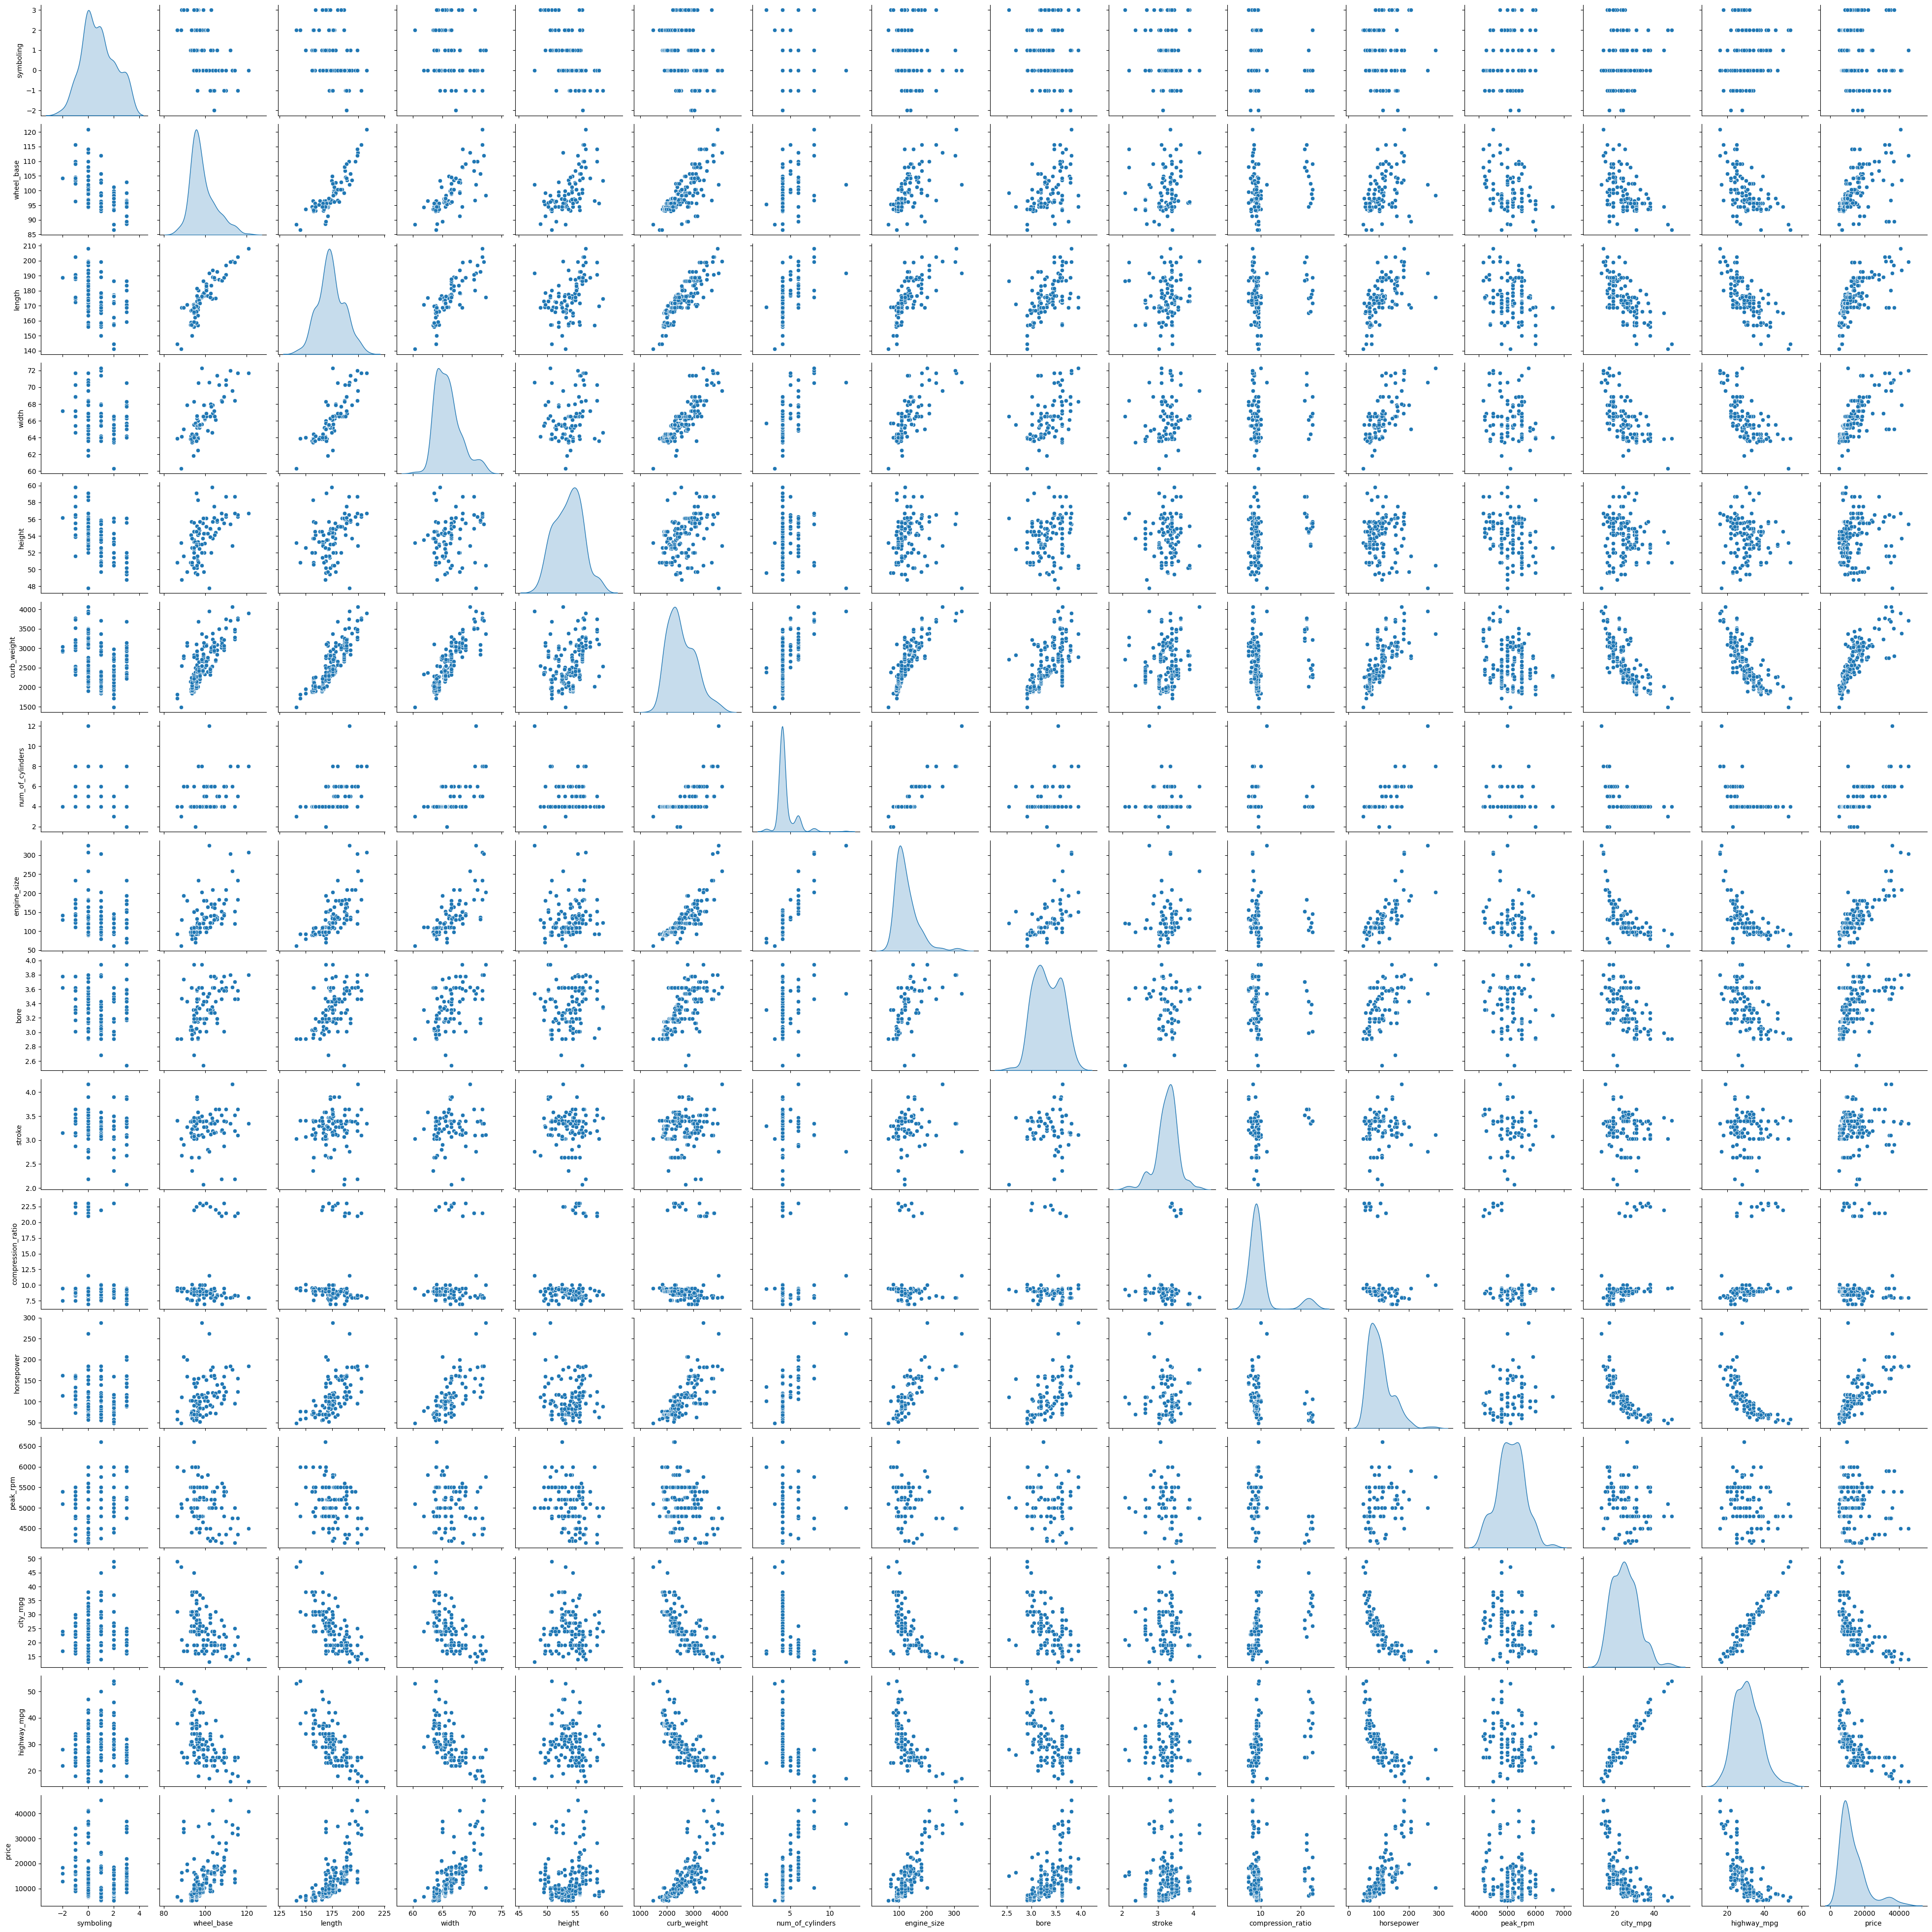

In [39]:
sns.pairplot(cars, diag_kind="kde")

# Generating Data Insights, Statistics and Visualization and Saving Reports

In [40]:
# We can use pandas ydata_profiling to see the statistics, data insights, visualization and we can save the reports as well
from ydata_profiling import ProfileReport

profile= ProfileReport(cars)

c:\Users\acreddy\Desktop\abc\LinearRegression_CarsDataSet\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
# to save the reports
profile.to_file("CARS_profile.html")
profile.to_file("CARS_profile.json")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 37.24it/s]


In [63]:
# lets split the data in to X of IVs and y of Target
X= cars.drop("price", axis=1)
y= cars["price"]

# Build the LineaRegression Model

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=22)

In [65]:
len(X_train), len(y_train)

(114, 114)

In [45]:
len(X_test), len(y_test)

(52, 52)

In [46]:
from sklearn.linear_model import LinearRegression

lin_reg= LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [47]:
lin_reg.coef_

array([ 8.44130212e+01,  1.31980870e+02, -4.14786983e+01,  5.91241754e+01,
        2.38276191e+02, -1.59474356e-01, -3.49999714e+03,  2.35941528e+02,
       -5.49294896e+03, -5.58253793e+03,  4.50590039e+02,  2.06720012e+01,
        3.94878595e+00,  4.33789549e+01, -2.02997413e+02])

In [48]:
# lets get the paramters from the model
for idx, col_name in enumerate(X_train.columns):
    print("The Coefficients for {}: {}".format(col_name, lin_reg.coef_[idx]))

The Coefficients for symboling: 84.4130212037054
The Coefficients for wheel_base: 131.98087045815055
The Coefficients for length: -41.47869831793654
The Coefficients for width: 59.12417544256704
The Coefficients for height: 238.27619113738967
The Coefficients for curb_weight: -0.1594743564662385
The Coefficients for num_of_cylinders: -3499.997139800348
The Coefficients for engine_size: 235.94152763968094
The Coefficients for bore: -5492.948961998596
The Coefficients for stroke: -5582.537925457099
The Coefficients for compression_ratio: 450.59003868683004
The Coefficients for horsepower: 20.672001161659097
The Coefficients for peak_rpm: 3.9487859491386614
The Coefficients for city_mpg: 43.378954893399914
The Coefficients for highway_mpg: -202.9974131128185


In [49]:
intercept= lin_reg.intercept_
intercept

-8992.381596190495

In [50]:
# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

In [51]:
# Calculate r2_score(accuracy) and MSE(mean_squared_error i,e loss/error)
# accuracy = lin_reg.score(X_test, y_test)
from sklearn.metrics import r2_score

r2_square= r2_score(y_test, y_pred)

In [52]:
r2_square

0.8003700871362651

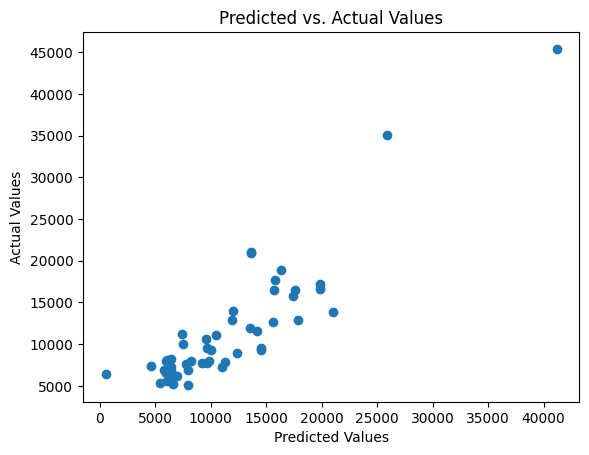

In [53]:
# lets plot the result to check homoscedacity and heteroscedacity
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.show()

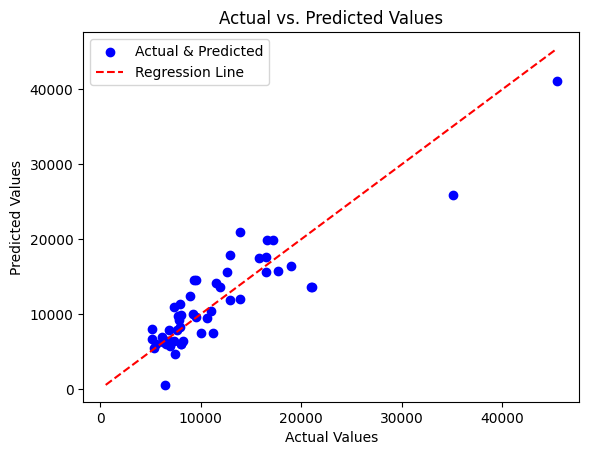

In [54]:
plt.scatter(y_test, y_pred, color="blue", label="Actual & Predicted")

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Regression Line")


plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()

# Show the plot
plt.show()

In [66]:
# Adjusted R-Square
R2_adjust= 1-(1-r2_square)*(len(cars)-1)/(len(cars)-X.shape[1]-1)
R2_adjust

0.7785127974066591

# OLS( Ordinary Least Square ) MEthod:

In [56]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [57]:
cars= pd.concat([X_train,y_train],axis=1)

In [58]:
cars.head()

,symboling,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
125,3,94.5,168.9,68.3,50.2,2778,4,151,3.94,3.11,9.5,143.0,5500.0,19,27,22018.0
25,1,93.7,157.3,63.8,50.6,1989,4,90,2.97,3.23,9.4,68.0,5500.0,31,38,6692.0
43,0,94.3,170.7,61.8,53.5,2337,4,111,3.31,3.23,8.5,78.0,4800.0,24,29,6785.0
144,0,97.0,172.0,65.4,54.3,2385,4,108,3.62,2.64,9.0,82.0,4800.0,24,25,9233.0
184,2,97.3,171.7,65.5,55.7,2264,4,97,3.01,3.40,23.0,52.0,4800.0,37,46,7995.0


In [59]:
cars.columns

Index(['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
       'num_of_cylinders', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [60]:
Incars= smf.ols(formula="price~symboling+wheel_base+length+width+height+curb_weight+num_of_cylinders+engine_size+\
                   bore+stroke+compression_ratio+horsepower+peak_rpm+city_mpg+highway_mpg",data=cars).fit()

In [61]:
# get the model parameters
Incars.params

Intercept           -8992.381596
symboling              84.413021
wheel_base            131.980870
length                -41.478698
width                  59.124175
height                238.276191
curb_weight            -0.159474
num_of_cylinders    -3499.997140
engine_size           235.941528
bore                -5492.948962
stroke              -5582.537925
compression_ratio     450.590039
horsepower             20.672001
peak_rpm                3.948786
city_mpg               43.378955
highway_mpg          -202.997413
dtype: float64

In [67]:
print(Incars.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     41.49
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           2.05e-43
Time:                        18:34:14   Log-Likelihood:                -1461.0
No. Observations:                 153   AIC:                             2954.
Df Residuals:                     137   BIC:                             3003.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -8992.3816   2.17e+0